In [ ]:
import pandas as pd
import numpy as np
import pickle
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import csv


from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 50)

In [ ]:
import os
# change this directory to a folder with all the files you want in it 
# directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/GAT'
#directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'
#directory_path = '/home/seh6fy/git/dspg22ari2/BERT_Analysis/FM_Docs'
directory_path = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/GAT'
#directory_path = '/sfs/qumulo/qhome/jhj5dh/ARI/dspg22ari2/BERT_Analysis/Analysis'
# list of file names in the directory
list_of_files = os.listdir(directory_path)

# initialize an empty dataframe to store the text documents
df = pd.DataFrame(columns=['text'])

In [ ]:
import os
import glob
# displays the number of words in each document 
# update the path to be a folder with the files you want to analyze in it 
folder_path = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/GAT'
#folder_path = "/home/seh6fy/git/dspg22ari2/BERT_Analysis/FM_Docs"
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

#directory = "/home/seh6fy/git/dspg22ari2/BERT_Analysis/FM_Docs"  # replace with the directory path
directory = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/GAT'
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

top_n = 10  # number of top words to display

def plot_top_words(file_path):
    # read the contents of the file
    with open(file_path, "r") as f:
        contents = f.read()

    # split the contents into words
    words = contents.split()
     #remove stop words
    stopwords = ['the', 'and', 'to', 'of', 'is', 'a', 'in', '.', 'or', 'for']
    words = [word for word in contents.split() if word.lower() not in stopwords]


    # initialize a Counter object to keep track of word frequencies
    word_counts = Counter(words)

    # get the top n most common words
    top_words = word_counts.most_common(top_n)

    # extract the words and frequencies as separate lists
    words, frequencies = zip(*top_words)

    # create a bar graph of the top words
    plt.bar(words, frequencies)
    plt.title("Top {} words in {}".format(top_n, os.path.basename(file_path)))
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(fontsize=8)
    plt.show()

# loop through all files in the directory and plot the top words for each file
for file_path in glob.glob(os.path.join(directory, "*")):
    plot_top_words(file_path)

          


In [ ]:
import os
import glob

#folder_path = "/home/seh6fy/git/dspg22ari2/BERT_Analysis/FM_Docs"
folder_path = '/home/jhj5dh/ARI/dspg22ari2/BERT_Analysis/GAT'
# Get a list of all the files in the folder
file_list = glob.glob(os.path.join(folder_path, '*.txt'))

# Iterate through each file and count the words
for file_path in file_list:
    with open(file_path, 'r') as file:
        words = file.read().split()
        word_count = len(words)
        
        # Create an empty dictionary to store word counts
        word_counts = {}
        
        # Iterate through each word and update the dictionary
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
                
        # Print the word counts for the file
        #print(f"{file_path}: {word_count} words")
        #for word, count in word_counts.items():
            #print(f"    {word}: {count}")


In [ ]:
import os
for filename in list_of_files:
    file_path = os.path.join(directory_path, filename)
    # check if the path is a file
    if os.path.isfile(file_path):
        # read the contents of the file and append as a new row to the dataframe
        text = pd.read_csv(file_path, error_bad_lines=False, encoding='utf-8', quoting=csv.QUOTE_NONE, lineterminator='.', header=None)[0].str.cat().strip()
        df = df.append({'text': text}, ignore_index=True)
        

In [ ]:
# this line is taking out the new lines so it doesn't display them all as seperate documents
df = df.replace(r'\n',' ', regex=True)
# https://medium.com/@armandj.olivares/using-bert-for-classifying-documents-with-long-texts-5c3e7b04573d

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
df = df.replace ('', ' ', regex = True)

In [ ]:

import unicodedata
df['text'] = df['text'].apply(lambda x: ''.join([' ' if not unicodedata.normalize('NFKD', char).encode('ASCII', 'ignore') else char for char in x]))


In [ ]:
# Old code
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer# Load the BERT tokenizer
from transformers import *
# here you could try switching the model from bert-base-cased

# # Load the BERT model
model = TFAutoModel.from_pretrained("bert-base-cased")
# max_seq_length = 512
model_name = 'bert-base-uncased'
bert_model = TFAutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [ ]:
import pandas as pd
import numpy as np
#import tensorflow as tf
from transformers import BertModel, BertTokenizer# Load the BERT tokenizer
from transformers import AutoModel, AutoTokenizer
# here you could try switching the model from bert-base-cased

# # Load the BERT model
model = AutoModel.from_pretrained("bert-base-cased")
# max_seq_length = 512
model_name = 'bert-base-uncased'
bert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# could look into different encoding methods
def encode_document(text, max_tokens=5):
    inputs = tokenizer(documents, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

vectors = df['text'].apply(lambda x: encode_document(str(x)))
output_vectors = pd.DataFrame(vectors.tolist())

# Write the output vectors to a csv file
# change the output vector name every time you change the folder
output_vectors.to_csv('output_vectors_FM.csv', index=False)


In [ ]:
# could look into different encoding methods
def encode_document(text, max_tokens=5):
    input_ids = tokenizer.encode(text, max_length=max_tokens, truncation=True, add_special_tokens=True)
    outputs = model(input_ids)
    last_hidden_state = outputs.last_hidden_state
    document_embedding = tf.reduce_mean(last_hidden_state, axis=1)
    return document_embedding.numpy().squeeze()

vectors = df['text'].apply(lambda x: encode_document(str(x)))
output_vectors = pd.DataFrame(vectors.tolist())

# Write the output vectors to a csv file
# change the output vector name every time you change the folder
output_vectors.to_csv('output_vectors_FM.csv', index=False)

In [2]:
import pandas as pd
import numpy as np
import pickle
import time
import math
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import csv


from sentence_transformers import SentenceTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 50)

output_vectors = pd.read_csv('output_vectors_gat.csv')

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

doc_names = []
# change the directory location to match the one above to have the correct document names
for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'):
#for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])
# Reduce the dimensionality of the vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)
for i, vec in enumerate(vectors_tsne):
    plt.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    plt.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)
# Plot the vectors
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

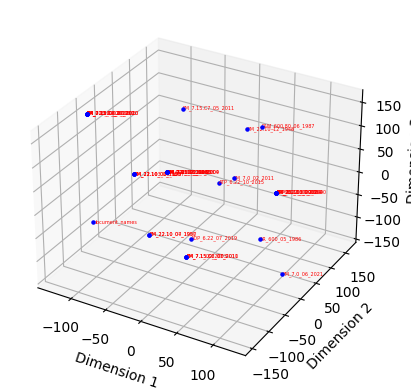

In [9]:
import os
from sklearn.manifold import TSNE
doc_names = []
# change the directory location to match the one above to have the correct document names
for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Docs'):
#for filename in os.listdir('/home/seh6fy/git/dspg22ari2/BERT_Analysis/Temporary'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)
    
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()




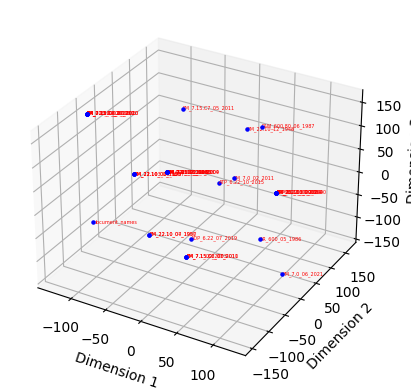

In [10]:
import os
from sklearn.manifold import TSNE

doc_names = []
# change the directory location to match the one above to have the correct document names
for filename in os.listdir('/home/js2mr/git/dspg22ari2/BERT_Analysis/Docs'):
    if filename.endswith('.txt'):
        doc_names.append(filename[:-4])

tsne = TSNE(n_components=3, random_state=42)
vectors_tsne = tsne.fit_transform(output_vectors)

np.savetxt('vectors_tsne.csv', vectors_tsne, delimiter=',')



# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, vec in enumerate(vectors_tsne):
    ax.scatter(vec[0], vec[1], vec[2], c='b', marker='o', s=5)
    ax.text(vec[0], vec[1], vec[2], doc_names[i], color='r', fontsize= 3.5)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Save the plot as a PDF file
# plt.savefig('plot.pdf')
plt.savefig('plot.pdf')
plt.show()
